<h1>Tara Saba<h1>

In [67]:
!pip install xgboost

import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import sklearn.metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

<h1>Preprocessing</h1>


<br>
<div>First unique values for each attribute is discovered. It could be seen that np.nan and 'Unknown' were the only invalid values in the set; so these values were given to the read_csv no be concidered as missing values and later recognized by the isnull() method. Unique values for each attribute is printed out in the section below.</div>

In [2]:
missing_values = [np.nan, 'Unknown']
diabetes_df = pd.read_csv('diabetes.csv', na_values = missing_values)

In [3]:
for col in diabetes_df:
    print(col)
    print(diabetes_df[col].unique())

Unnamed: 0
[    0     1     2 ... 70689 70690 70691]
Diabetes_binary
[0. 1.]
HighBP
[1. 0.]
High Cholesterol
[0. 1.]
Cholesterol Check
[1. 0.]
BMI
[26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. nan 80. 78. 74.]
Smoker
[0. 1.]
Stroke
[0. 1.]
HeartDiseaseorAttack
[ 0.  1. nan]
Physical Activity
[ 1.  0. nan]
Fruits
[ 0.  1. nan]
Veggies
[ 1.  0. nan]
Heavy Alcohol Consumption
[ 0.  1. nan]
Any Health Care
[ 1.  0. nan]
No Doctor because of Cost
[ 0.  1. nan]
General Health
['Medium' 'High' 'Good' 'Low' 'Very Low' nan]
Mental Health
[ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. nan 24. 23. 11. 19.]
Physical Health
[30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21

<div>Missing values can be fully recognized now by the isnull method after the modifications mentioned above. The number of missing values in each attribute is printed below. The full rows containing missing values is also provided.</div>

In [4]:
diabetes_df.isnull().sum()

Unnamed: 0                   0
Diabetes_binary              0
HighBP                       0
High Cholesterol             0
Cholesterol Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         1
Physical Activity            1
Fruits                       2
Veggies                      1
Heavy Alcohol Consumption    1
Any Health Care              2
No Doctor because of Cost    2
General Health               1
Mental Health                1
Physical Health              1
Difficulty Walking           2
Sex                          1
Age                          1
Education                    1
Income                       2
dtype: int64

In [5]:
diabetes_df[diabetes_df.isna().any(axis=1)]

,Unnamed: 0,Diabetes_binary,HighBP,High Cholesterol,Cholesterol Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical Activity,...,Any Health Care,No Doctor because of Cost,General Health,Mental Health,Physical Health,Difficulty Walking,Sex,Age,Education,Income
10000,10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
11691,11691,0.0,0.0,0.0,1.0,27.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20000,20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8
60000,60000,1.0,1.0,1.0,0.0,30.0,1.0,1.0,0.0,1.0,...,1.0,0.0,Low,30.0,30.0,1.0,female,8.0,Cat5,NaN


<div>Before doing anything spaces in the column names are recognized and changed to "_".</div>

In [6]:
diabetes_df.columns = diabetes_df.columns.str.replace(' ','_')

<div>The first step to handle the missing values is to delete rows with more than 7 missing values.</div>

In [7]:
diabetes_df = diabetes_df[diabetes_df.isnull().sum(axis=1) < 7]
diabetes_df.isnull().sum()

Unnamed:_0                   0
Diabetes_binary              0
HighBP                       0
High_Cholesterol             0
Cholesterol_Check            0
BMI                          1
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
Physical_Activity            0
Fruits                       1
Veggies                      0
Heavy_Alcohol_Consumption    0
Any_Health_Care              1
No_Doctor_because_of_Cost    1
General_Health               0
Mental_Health                0
Physical_Health              0
Difficulty_Walking           1
Sex                          0
Age                          0
Education                    0
Income                       1
dtype: int64

In [8]:
diabetes_df[diabetes_df.isna().any(axis=1)]

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
10000,10000,0.0,0.0,1.0,1.0,21.0,1.0,1.0,0.0,0.0,...,1.0,0.0,Low,0.0,30.0,0.0,male,13.0,Cat5,Cat7
20000,20000,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,...,NaN,0.0,Good,0.0,0.0,1.0,female,13.0,Cat3,Cat5
30000,30000,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,...,1.0,NaN,Good,0.0,0.0,0.0,female,6.0,Cat6,Cat5
40000,40000,1.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,0.0,...,1.0,0.0,Medium,0.0,0.0,NaN,male,8.0,Cat5,Cat7
50000,50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8
60000,60000,1.0,1.0,1.0,0.0,30.0,1.0,1.0,0.0,1.0,...,1.0,0.0,Low,30.0,30.0,1.0,female,8.0,Cat5,NaN


<div>Next, missing values in binary and categorical attributes are filled with the mode of that attribute grouped by the target value aka. the label.</div>

In [9]:
def get_col_mode(df, key_cols, value_col):
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [10]:
diabetes_df.loc[diabetes_df.Fruits.isnull(), 'Fruits'] = diabetes_df.Diabetes_binary.map(get_col_mode(diabetes_df, ['Diabetes_binary'], 'Fruits').set_index('Diabetes_binary').Fruits)
diabetes_df.loc[diabetes_df.Any_Health_Care.isnull(), 'Any_Health_Care'] = diabetes_df.Diabetes_binary.map(get_col_mode(diabetes_df, ['Diabetes_binary'], 'Any_Health_Care').set_index('Diabetes_binary').Any_Health_Care)
diabetes_df.loc[diabetes_df.No_Doctor_because_of_Cost.isnull(), 'No_Doctor_because_of_Cost'] = diabetes_df.Diabetes_binary.map(get_col_mode(diabetes_df, ['Diabetes_binary'], 'No_Doctor_because_of_Cost').set_index('Diabetes_binary').No_Doctor_because_of_Cost)
diabetes_df.loc[diabetes_df.Difficulty_Walking.isnull(), 'Difficulty_Walking'] = diabetes_df.Diabetes_binary.map(get_col_mode(diabetes_df, ['Diabetes_binary'], 'Difficulty_Walking').set_index('Diabetes_binary').Difficulty_Walking)
diabetes_df.loc[diabetes_df.Income.isnull(), 'Income'] = diabetes_df.Diabetes_binary.map(get_col_mode(diabetes_df, ['Diabetes_binary'], 'Income').set_index('Diabetes_binary').Income)

In [11]:
diabetes_df[diabetes_df.isna().any(axis=1)]

,Unnamed:_0,Diabetes_binary,HighBP,High_Cholesterol,Cholesterol_Check,BMI,Smoker,Stroke,HeartDiseaseorAttack,Physical_Activity,...,Any_Health_Care,No_Doctor_because_of_Cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age,Education,Income
50000,50000,1.0,1.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,...,1.0,0.0,Medium,2.0,2.0,0.0,female,9.0,Cat6,Cat8


<div>Missing values in numeric attributes (those which contain at least one missing value of course which in this case is only the BMI attribute) are filled with the median of that attribute.</div>

In [12]:
diabetes_df['BMI'] = diabetes_df['BMI'].fillna(diabetes_df['BMI'].median())

<div>Now we need to normalize the numeric attributes with vast ranges. The best way to do this (in our case of course) is to scale them down to range [0,1] (Other stuff was tested as well but this method gave better results and also personally I like this one better).</div>

In [13]:
min_max_scaler = MinMaxScaler()
diabetes_df[['BMI', 'Mental_Health', 'Physical_Health', 'Age']] = min_max_scaler.fit_transform(diabetes_df[['BMI', 'Mental_Health', 'Physical_Health', 'Age']])

<div>Next we convert the categorical features to binary features using one-hot encoding. General_Health, Sex (well technically that's a binary attribute but it was a symmetric one), Education and Income are the categorical features here.</div>

In [14]:
diabetes_df = pd.get_dummies(diabetes_df)
for col in diabetes_df:
    print(col)
    print(diabetes_df[col].unique())

Unnamed:_0
[    0     1     2 ... 70689 70690 70691]
Diabetes_binary
[0. 1.]
HighBP
[1. 0.]
High_Cholesterol
[0. 1.]
Cholesterol_Check
[1. 0.]
BMI
[0.1627907  0.18604651 0.19767442 0.06976744 0.22093023 0.23255814
 0.1744186  0.13953488 0.10465116 0.53488372 0.20930233 0.09302326
 0.11627907 0.30232558 0.3255814  0.15116279 0.27906977 0.40697674
 0.08139535 0.29069767 0.3372093  0.12790698 0.25581395 0.26744186
 0.34883721 0.05813953 0.24418605 0.37209302 0.03488372 0.46511628
 0.6627907  0.51162791 0.38372093 0.31395349 0.93023256 0.47674419
 1.         0.44186047 0.39534884 0.77906977 0.41860465 0.04651163
 0.59302326 0.69767442 0.48837209 0.43023256 0.65116279 0.36046512
 0.8372093  0.70930233 0.74418605 0.5        0.45348837 0.73255814
 0.52325581 0.55813953 0.         0.75581395 0.81395349 0.63953488
 0.68604651 0.56976744 0.02325581 0.80232558 0.54651163 0.86046512
 0.01162791 0.87209302 0.61627907 0.96511628 0.89534884 0.58139535
 0.60465116 0.62790698 0.84883721 0.6744186  0.82

<div>At this point, all we need to do is to separate the target feature (the label) from the other features and divide the dataset into the train set and the test set (20% of the whole data set) in order to be fed to the model for training.</div>

In [15]:
diabetes_df = diabetes_df.iloc[: , 1:]
training_cols = [col for col in diabetes_df.columns if col not in ['Diabetes_binary']]
X = diabetes_df.loc[:, training_cols]
target = diabetes_df.loc[:, 'Diabetes_binary']
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = 0.2)
X_train.shape, X_test.shape, target_train.shape, target_test.shape

((56552, 38), (14139, 38), (56552,), (14139,))

<h1>Building the classifier model</h1>

<div>Here we define an xgboost classifier with hyperparameters initialized as in those of the instructions and fit it to the training data.</div>

In [81]:
model_xgboost = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 200, subsample = 0.5, colsample_bytree = 1, random_state = 123, eval_metric = 'auc', verbosity = 1)
eval_set = [(X_test, target_test)]
model_xgboost.fit(X_train, target_train, early_stopping_rounds = 10, eval_set= eval_set, verbose = True)


[0]	validation_0-auc:0.78816
[1]	validation_0-auc:0.80345
[2]	validation_0-auc:0.80654
[3]	validation_0-auc:0.81072
[4]	validation_0-auc:0.81359
[5]	validation_0-auc:0.81456
[6]	validation_0-auc:0.81696
[7]	validation_0-auc:0.81748
[8]	validation_0-auc:0.81811
[9]	validation_0-auc:0.81905
[10]	validation_0-auc:0.82098
[11]	validation_0-auc:0.82234
[12]	validation_0-auc:0.82264
[13]	validation_0-auc:0.82390
[14]	validation_0-auc:0.82488
[15]	validation_0-auc:0.82531
[16]	validation_0-auc:0.82623
[17]	validation_0-auc:0.82676
[18]	validation_0-auc:0.82740
[19]	validation_0-auc:0.82802
[20]	validation_0-auc:0.82836
[21]	validation_0-auc:0.82859
[22]	validation_0-auc:0.82892
[23]	validation_0-auc:0.82918
[24]	validation_0-auc:0.82964
[25]	validation_0-auc:0.82992
[26]	validation_0-auc:0.83013
[27]	validation_0-auc:0.83037
[28]	validation_0-auc:0.83062
[29]	validation_0-auc:0.83081
[30]	validation_0-auc:0.83091
[31]	validation_0-auc:0.83104
[32]	validation_0-auc:0.83123
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

<div>In this section, we predict the training and the testing set using the model that is trained and ready to be used. The accuracy, precision and recall values are further reported for both sets and the corresponding confusion matrices are drawn.</div>

In [82]:
y_train_pred = model_xgboost.predict(X_train)
y_pred = model_xgboost.predict(X_test)

In [83]:
def print_reports(y_test, y_pred):
    print('accuracy: '+ str(sklearn.metrics.accuracy_score(y_test, y_pred)))
    print('precision: ' + str(sklearn.metrics.precision_score(y_test, y_pred)))
    print('recall: ' + str(sklearn.metrics.recall_score(y_test, y_pred)))

In [84]:
print('Training data:')
print_reports(target_train, y_train_pred)
print('Test data:')
print_reports(target_test, y_pred)

Training data:
accuracy: 0.7572322817937474
precision: 0.7368455326908049
recall: 0.8002970612158291
Test data:
accuracy: 0.7547209845109272
precision: 0.7330744336569579
recall: 0.8011034092516622


In [85]:
def draw_confusion_matrix(y_test, y_pred, title):
    array = confusion_matrix(y_test, y_pred)
    df = pd.DataFrame(array, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
    plt.figure()
    sn.heatmap(df, annot=True, cmap='Purples', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

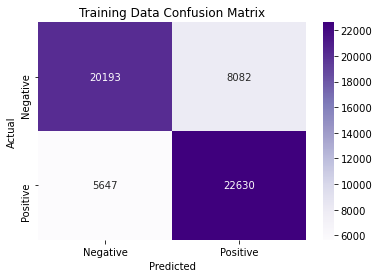

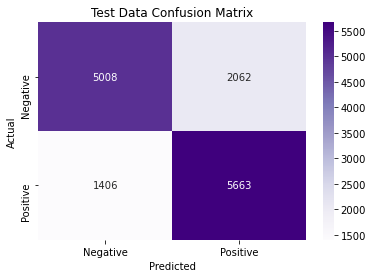

In [86]:
draw_confusion_matrix(target_train, y_train_pred, "Training Data Confusion Matrix")
draw_confusion_matrix(target_test, y_pred, "Test Data Confusion Matrix")

<h1>Hyperparameter tuning</h1>
<br>
<div>In this section an GridSearchCV object is built and the specified values for each of the hyperparameters envolved in the tuning process are fed to it along with an xgboost classifier as an estimator. Next the 72 models are trained each with 3 folds .</div>

In [87]:
def my_roc_auc_score(model, X, y): 
    return roc_auc_score(y, model.predict_proba(X)[:,1])

In [89]:
param_grid = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree' : [0.8, 1]
}
model_xgb_hyper = GridSearchCV(estimator= xgb.XGBClassifier(eval_metric = 'auc', subsample = 0.5),
                              param_grid = param_grid, cv = 3, scoring = my_roc_auc_score,
                              return_train_score= True, verbose = 4)
model_xgb_hyper.fit(X, target)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=100;, score=(train=0.816, test=0.811) total time=   0.8s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=100;, score=(train=0.816, test=0.810) total time=   0.8s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=100;, score=(train=0.812, test=0.819) total time=   0.7s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.826, test=0.820) total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.825, test=0.820) total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=200;, score=(train=0.821, test=0.828) total time=   1.5s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.02, max_depth=2, n_estimators=300;, score=(train=0.829, tes

[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=2, n_estimators=200;, score=(train=0.830, test=0.836) total time=   2.2s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=2, n_estimators=300;, score=(train=0.836, test=0.826) total time=   3.0s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=2, n_estimators=300;, score=(train=0.836, test=0.827) total time=   3.0s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=2, n_estimators=300;, score=(train=0.831, test=0.836) total time=   3.0s
[CV 1/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=0.836, test=0.827) total time=   1.4s
[CV 2/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=0.836, test=0.827) total time=   1.4s
[CV 3/3] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=0.831, test=0.836) total time=   1.4s
[CV 1/3] END colsample_bytree=0.8, learni

[CV 3/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=100;, score=(train=0.819, test=0.825) total time=   1.7s
[CV 1/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=200;, score=(train=0.831, test=0.824) total time=   3.2s
[CV 2/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=200;, score=(train=0.831, test=0.824) total time=   3.1s
[CV 3/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=200;, score=(train=0.827, test=0.832) total time=   3.2s
[CV 1/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=300;, score=(train=0.834, test=0.826) total time=   4.8s
[CV 2/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=300;, score=(train=0.834, test=0.826) total time=   4.6s
[CV 3/3] END colsample_bytree=1, learning_rate=0.02, max_depth=3, n_estimators=300;, score=(train=0.829, test=0.834) total time=   4.5s
[CV 1/3] END colsample_bytree=1, learning_rate=0

[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.840, test=0.827) total time=   2.0s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.840, test=0.827) total time=   1.9s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=100;, score=(train=0.836, test=0.836) total time=   2.0s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=200;, score=(train=0.846, test=0.826) total time=   3.8s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=200;, score=(train=0.847, test=0.827) total time=   3.8s
[CV 3/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=200;, score=(train=0.843, test=0.835) total time=   3.8s
[CV 1/3] END colsample_bytree=1, learning_rate=0.1, max_depth=4, n_estimators=300;, score=(train=0.851, test=0.825) total time=   5.9s
[CV 2/3] END colsample_bytree=1, learning_rate=0.1, max

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', gamma=None, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7f8c012203a0>, verbose=4)

<div>The best hyperparameters are determined and printed below.</div>

In [90]:
model_xgb_hyper.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 4,
 'n_estimators': 200}

<div>A model is created with the best hyperparameters and the train and test sets are predicted with it. Results for the accuracy, precision and recall values are further reported along side the corresponding confusion matrices.</div>

In [91]:
best_model = xgb.XGBClassifier(learning_rate = 0.05, max_depth = 4, n_estimators = 200, subsample = 0.5, colsample_bytree = 1, random_state = 123, eval_metric = 'auc', verbosity = 1)
eval_set = [(X_test, target_test)]
best_model.fit(X_train, target_train, early_stopping_rounds = 10, eval_set= eval_set, verbose = True)


[0]	validation_0-auc:0.78816
[1]	validation_0-auc:0.80316
[2]	validation_0-auc:0.80420
[3]	validation_0-auc:0.80799
[4]	validation_0-auc:0.81206
[5]	validation_0-auc:0.81277
[6]	validation_0-auc:0.81443
[7]	validation_0-auc:0.81523
[8]	validation_0-auc:0.81571
[9]	validation_0-auc:0.81624
[10]	validation_0-auc:0.81669
[11]	validation_0-auc:0.81693
[12]	validation_0-auc:0.81716
[13]	validation_0-auc:0.81729
[14]	validation_0-auc:0.81774
[15]	validation_0-auc:0.81812
[16]	validation_0-auc:0.81862
[17]	validation_0-auc:0.81908
[18]	validation_0-auc:0.82046
[19]	validation_0-auc:0.82141
[20]	validation_0-auc:0.82178
[21]	validation_0-auc:0.82183
[22]	validation_0-auc:0.82212
[23]	validation_0-auc:0.82258
[24]	validation_0-auc:0.82308
[25]	validation_0-auc:0.82366
[26]	validation_0-auc:0.82395
[27]	validation_0-auc:0.82435
[28]	validation_0-auc:0.82480
[29]	validation_0-auc:0.82522
[30]	validation_0-auc:0.82550
[31]	validation_0-auc:0.82584
[32]	validation_0-auc:0.82628
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [97]:
y_train_pred_best= best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

In [98]:
print('Training data:')
print_reports(target_train, y_train_pred_best)
print('Test data:')
print_reports(target_test, y_test_pred_best)

Training data:
accuracy: 0.7564719196491725
precision: 0.7357693182926432
recall: 0.8004031545071967
Test data:
accuracy: 0.7536600891152132
precision: 0.7308187435633368
recall: 0.8030838873956713


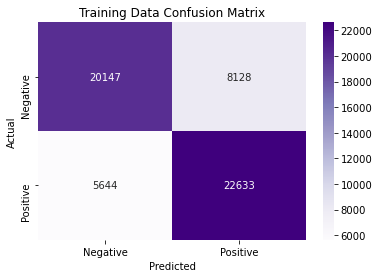

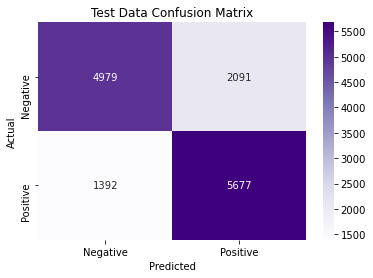

In [99]:
draw_confusion_matrix(target_train, y_train_pred_best, "Training Data Confusion Matrix")
draw_confusion_matrix(target_test, y_test_pred_best, "Test Data Confusion Matrix")

In [102]:
hyper_results = pd.DataFrame(model_xgb_hyper.cv_results_)
hyper_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.738795,0.007234,0.018065,0.000336,0.8,0.02,2,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.811191,0.810105,0.818952,0.813416,0.003939,72,0.816257,0.815867,0.812049,0.814724,0.001899
1,1.423232,0.024389,0.022458,0.000744,0.8,0.02,2,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.819745,0.819689,0.828162,0.822532,0.003981,65,0.825522,0.825340,0.821384,0.824082,0.001909
2,2.187583,0.032152,0.027663,0.002799,0.8,0.02,2,300,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.823148,0.823412,0.831644,0.826068,0.003944,54,0.829240,0.829084,0.825017,0.827781,0.001955
3,1.034641,0.028841,0.023618,0.000078,0.8,0.02,3,100,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.817136,0.815854,0.825508,0.819499,0.004281,69,0.823007,0.822314,0.818982,0.821434,0.001757
4,2.823441,0.149994,0.031321,0.005031,0.8,0.02,3,200,"{'colsample_bytree': 0.8, 'learning_rate': 0.0...",0.824052,0.823984,0.832275,0.826770,0.003892,51,0.830673,0.830534,0.826506,0.829238,0.001932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3.559963,0.011855,0.038326,0.000822,1,0.3,3,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.824804,0.824360,0.831276,0.826813,0.003160,50,0.844788,0.844955,0.840692,0.843478,0.001972
68,5.409460,0.098273,0.042675,0.000485,1,0.3,3,300,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.822613,0.823637,0.829772,0.825341,0.003161,57,0.848209,0.848629,0.844425,0.847088,0.001891
69,2.151687,0.052613,0.034153,0.000811,1,0.3,4,100,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.822466,0.823438,0.831179,0.825694,0.003898,55,0.848180,0.848735,0.843257,0.846724,0.002462
70,4.214448,0.022913,0.040100,0.001298,1,0.3,4,200,"{'colsample_bytree': 1, 'learning_rate': 0.3, ...",0.819119,0.820237,0.826739,0.822032,0.003360,66,0.858017,0.858313,0.853110,0.856480,0.002386


<h1>Hyperparameter tuning visualization</h1>
<br>
<div>The plots corresponding to the hyperparameters tuned can be observed in the section below. As it can be observed, the score is increased (until 0.1) and then decreased with the increase in the learning rate value. The same result is observed in max_depth tuning (increase until 3 and the decrease in score with 4).</div>
<br>
<div>The score of the test is increased with the increase in n_estimators value.</div>
<br>
<div>It seems that the colsample_bytree value has no significant effect on the results.</div>

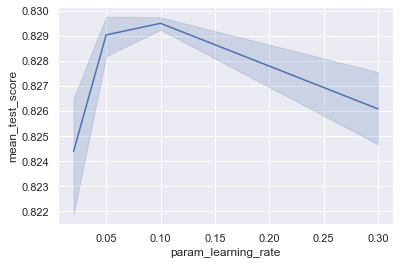

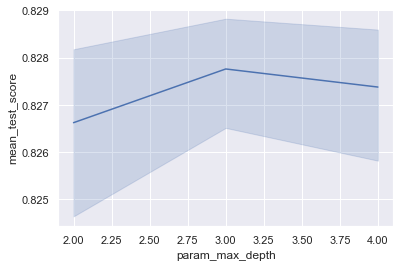

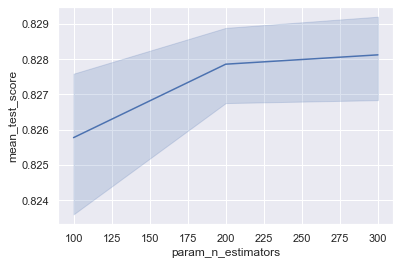

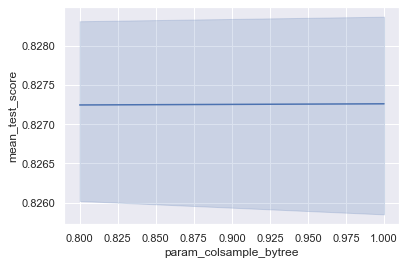

In [117]:
sn.lineplot(data= hyper_results, x="param_learning_rate",y= "mean_test_score")
plt.show()
sn.lineplot(data= hyper_results, x="param_max_depth",y= "mean_test_score")
plt.show()
sn.lineplot(data= hyper_results, x="param_n_estimators",y= "mean_test_score")
plt.show()
sn.lineplot(data= hyper_results, x="param_colsample_bytree",y= "mean_test_score")
plt.show()